In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
import re

### Reading and Cleaning data

Read in data from kaggle

Reference: https://www.kaggle.com/datasets/parisrohan/credit-score-classification

In [61]:
# train = pd.read_csv('./../Data/train.csv', dtype={'Age':int})
train = pd.read_csv('./../Data/train.csv')
test = pd.read_csv('./../Data/test.csv')

<ipython-input-61-97a9f0dedd64>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('./../Data/train.csv')


Most of data columns are not in the desired type, and therefore do data cleaning.

In [62]:
train.describe(include='all')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,84998.000000,100000.000000,...,100000,100000,100000.000000,90970,100000,100000.000000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,NaN,NaN,...,4,13178,NaN,404,3,NaN,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,NaN,NaN,...,Standard,1360.45,NaN,15 Years and 11 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,NaN,NaN,...,36479,24,NaN,446,52326,NaN,4305,25513,9,53174
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4194.170850,17.091280,...,NaN,NaN,32.285173,NaN,NaN,1403.118217,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3183.686167,117.404834,...,NaN,NaN,5.116875,NaN,NaN,8306.041270,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.000000,...,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625.568229,3.000000,...,NaN,NaN,28.052567,NaN,NaN,30.306660,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.745000,6.000000,...,NaN,NaN,32.305784,NaN,NaN,69.249473,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5957.448333,7.000000,...,NaN,NaN,36.496663,NaN,NaN,161.224249,NaN,NaN,NaN,NaN


In [63]:
train = train.dropna()

In [64]:
train.Age = train.Age.str.extract('(\d+)').astype(np.number)

train.Annual_Income = train.Annual_Income.str.extract('(\d+)').astype(np.number)

train.Outstanding_Debt = train.Outstanding_Debt.str.extract('(\d+)').astype(np.number)
train.Credit_History_Age = [int(j)*12+int(k) for [j,k] in [re.findall(r'\d+', entry) for entry in train.Credit_History_Age]]

train = train[train.Age < 80]
train = train[train.Annual_Income < 200000]

train = train[train.Num_Bank_Accounts < 50]
train = train[train.Num_Credit_Card < 50]
train = train[train.Num_Credit_Inquiries < 50]

train = train[train.Interest_Rate < 50]
train = train[train.Total_EMI_per_month < 10000]

In [65]:
train.describe(include=[np.number])

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month
count,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000,46055.000000
mean,32.909391,48349.322766,4021.103356,5.536294,5.667832,15.210661,22.027988,6.103898,1506.833286,32.212346,213.258821,133.498898
std,10.664337,37147.457817,3092.921225,2.630826,2.181461,8.881308,15.234192,3.909733,1187.778260,5.058985,100.176274,359.647834
min,14.000000,7005.000000,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,0.000000,20.881250,2.000000,4.462837
25%,24.000000,18784.000000,1579.338333,4.000000,4.000000,8.000000,10.000000,3.000000,605.000000,28.034832,134.000000,40.260464
50%,33.000000,35746.000000,2986.635833,6.000000,6.000000,15.000000,19.000000,6.000000,1240.000000,32.239566,211.000000,75.585414
75%,41.000000,68542.500000,5702.813333,8.000000,7.000000,21.000000,29.000000,9.000000,2130.000000,36.404758,292.000000,157.304156
max,56.000000,179987.000000,15204.633333,45.000000,49.000000,34.000000,67.000000,45.000000,4998.000000,49.564519,404.000000,9997.000000


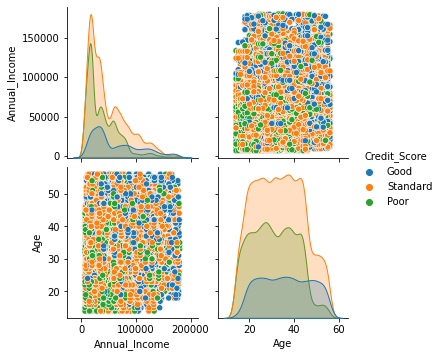

In [66]:
_ = sns.pairplot(train, hue='Credit_Score', vars=['Annual_Income', 'Age'])